# DATA PREPARATION

In [1]:
# Data Manipulation 
import numpy as np
import pandas as pd
import random as rd
import math

# Visualization 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from sklearn.preprocessing import LabelEncoder #Encode
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from copy import deepcopy

# Plot the Figures Inline
%matplotlib inline

data = pd.read_csv("salju_train.csv")

# DATA EXPLORATION

In [2]:
data.head()

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,1,01/06/2014,C4,10.4,15.5,4.8,NaN,NaN,WSW,24.0,...,78.0,76.0,1020.1,1018.5,NaN,NaN,13.1,15.0,Ya,Tidak
1,2,15/07/2014,C10,9.0,17.0,8.0,2.6,7.4,NaN,NaN,...,80.0,61.0,1015.2,1014.6,7.0,5.0,11.9,15.5,Ya,Ya
2,3,16/02/2011,C46,18.2,32.0,0.0,NaN,NaN,ESE,44.0,...,62.0,42.0,NaN,NaN,NaN,NaN,23.8,29.6,Tidak,Tidak
3,4,08/08/2012,C36,7.3,24.5,0.0,8.4,10.4,SSW,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,Tidak,Tidak
4,5,29/10/2016,C7,5.9,20.3,0.0,3.6,12.6,N,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,Tidak,Tidak


In [3]:
data.describe()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
count,109095.000000,107973.000000,108166.000000,106664.000000,62071.000000,56716.000000,101399.000000,107742.000000,106792.000000,107093.000000,105721.000000,97768.000000,97787.000000,67251.000000,64624.000000,107755.000000,106397.000000
mean,54548.000000,12.196183,23.214819,2.385005,5.462440,7.599527,40.032002,14.052115,18.677579,68.895577,51.567626,1017.647080,1015.253117,4.450893,4.516140,16.991391,21.672771
std,31493.158146,6.389419,7.106596,8.588155,4.201638,3.789042,13.617554,8.926092,8.830199,18.995528,20.791573,7.117338,7.047875,2.884566,2.718738,6.477602,6.922833
min,1.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,27274.500000,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,54548.000000,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,81821.500000,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,109095.000000,33.900000,47.300000,371.000000,145.000000,14.300000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109095 entries, 0 to 109094
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        109095 non-null  int64  
 1   Tanggal                   109095 non-null  object 
 2   KodeLokasi                109095 non-null  object 
 3   SuhuMin                   107973 non-null  float64
 4   SuhuMax                   108166 non-null  float64
 5   Hujan                     106664 non-null  float64
 6   Penguapan                 62071 non-null   float64
 7   SinarMatahari             56716 non-null   float64
 8   ArahAnginTerkencang       101351 non-null  object 
 9   KecepatanAnginTerkencang  101399 non-null  float64
 10  ArahAngin9am              101172 non-null  object 
 11  ArahAngin3pm              105898 non-null  object 
 12  KecepatanAngin9am         107742 non-null  float64
 13  KecepatanAngin3pm         106792 non-null  f

In [5]:
data.corr()

,id,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,KecepatanAnginTerkencang,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm
id,1.000000,0.007520,0.004129,0.001892,-0.002019,-0.003793,-0.003330,0.001467,-0.000819,0.002330,0.002229,-0.004429,-0.004715,0.001144,0.000388,0.006948,0.004265
SuhuMin,0.007520,1.000000,0.735500,0.104391,0.465508,0.072501,0.177627,0.174358,0.174122,-0.232101,0.007974,-0.449684,-0.459596,0.077349,0.021105,0.901208,0.707578
SuhuMax,0.004129,0.735500,1.000000,-0.074669,0.585475,0.470991,0.068244,0.013632,0.050793,-0.504014,-0.507921,-0.331431,-0.426012,-0.291573,-0.279039,0.886984,0.984434
Hujan,0.001892,0.104391,-0.074669,1.000000,-0.058940,-0.226845,0.135081,0.087157,0.059562,0.223661,0.254898,-0.168638,-0.127506,0.195540,0.170791,0.011781,-0.079160
Penguapan,-0.002019,0.465508,0.585475,-0.058940,1.000000,0.364745,0.198965,0.188950,0.128217,-0.499698,-0.387161,-0.268648,-0.291740,-0.181615,-0.181563,0.542808,0.570758
SinarMatahari,-0.003793,0.072501,0.470991,-0.226845,0.364745,1.000000,-0.035040,0.002004,0.051812,-0.489242,-0.627920,0.041321,-0.020052,-0.676965,-0.703482,0.291601,0.490993
KecepatanAnginTerkencang,-0.003330,0.177627,0.068244,0.135081,0.198965,-0.035040,1.000000,0.604677,0.686629,-0.214062,-0.026049,-0.460665,-0.415953,0.071323,0.105835,0.150043,0.033001
KecepatanAngin9am,0.001467,0.174358,0.013632,0.087157,0.188950,0.002004,0.604677,1.000000,0.518093,-0.272566,-0.032366,-0.229197,-0.176461,0.024425,0.051593,0.127675,0.004132
KecepatanAngin3pm,-0.000819,0.174122,0.050793,0.059562,0.128217,0.051812,0.686629,0.518093,1.000000,-0.144640,0.016263,-0.298189,-0.257869,0.050446,0.023239,0.162047,0.027859
Kelembaban9am,0.002330,-0.232101,-0.504014,0.223661,-0.499698,-0.489242,-0.214062,-0.272566,-0.144640,1.000000,0.667101,0.138628,0.185534,0.452897,0.356101,-0.471206,-0.498840


## DROP YANG MEMILIKI NILAI NULL

In [6]:
data.dropna(inplace=True)
data.shape

(42411, 24)

In [7]:
data.isnull().sum()

id                          0
Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

Categorical attribute -> Numerical Attribute

In [8]:
categorical = data.dtypes==object
categorical_cols = data.columns[categorical].tolist()
data[categorical_cols] = data[categorical_cols].apply(lambda col: LabelEncoder().fit_transform(col))
data[categorical_cols].head()
data

,id,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,...,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
3,4,849,15,7.3,24.5,0.0,8.4,10.4,11,54.0,...,25.0,17.0,1019.2,1016.9,1.0,7.0,15.3,23.2,0,0
4,5,3188,23,5.9,20.3,0.0,3.6,12.6,3,37.0,...,55.0,48.0,1019.7,1014.7,2.0,6.0,12.4,18.1,0,0
5,6,1271,2,14.4,21.8,0.0,3.2,4.4,12,39.0,...,63.0,52.0,1016.1,1012.5,7.0,7.0,16.7,21.1,0,0
6,7,1380,15,7.7,18.7,0.2,5.6,9.7,14,46.0,...,69.0,31.0,1011.3,1008.8,1.0,1.0,11.3,18.3,0,0
8,9,1903,24,18.4,35.3,0.0,10.0,12.5,1,33.0,...,44.0,18.0,1017.9,1013.4,0.0,0.0,23.7,34.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109080,109081,232,18,16.8,34.1,0.0,12.8,10.3,1,85.0,...,48.0,28.0,1013.4,1009.2,1.0,4.0,25.6,33.0,0,0
109082,109083,2396,4,8.7,19.0,0.0,1.4,9.6,13,24.0,...,81.0,59.0,1024.6,1022.3,2.0,2.0,10.8,16.5,0,0
109088,109089,1877,6,14.3,26.2,0.0,8.0,12.6,5,50.0,...,51.0,37.0,1019.2,1015.6,0.0,2.0,21.1,25.5,0,0
109090,109091,3309,17,20.1,23.7,0.0,7.2,8.9,2,43.0,...,74.0,70.0,1019.3,1017.6,4.0,6.0,22.0,22.1,0,1


## Visualisasi

<AxesSubplot:>

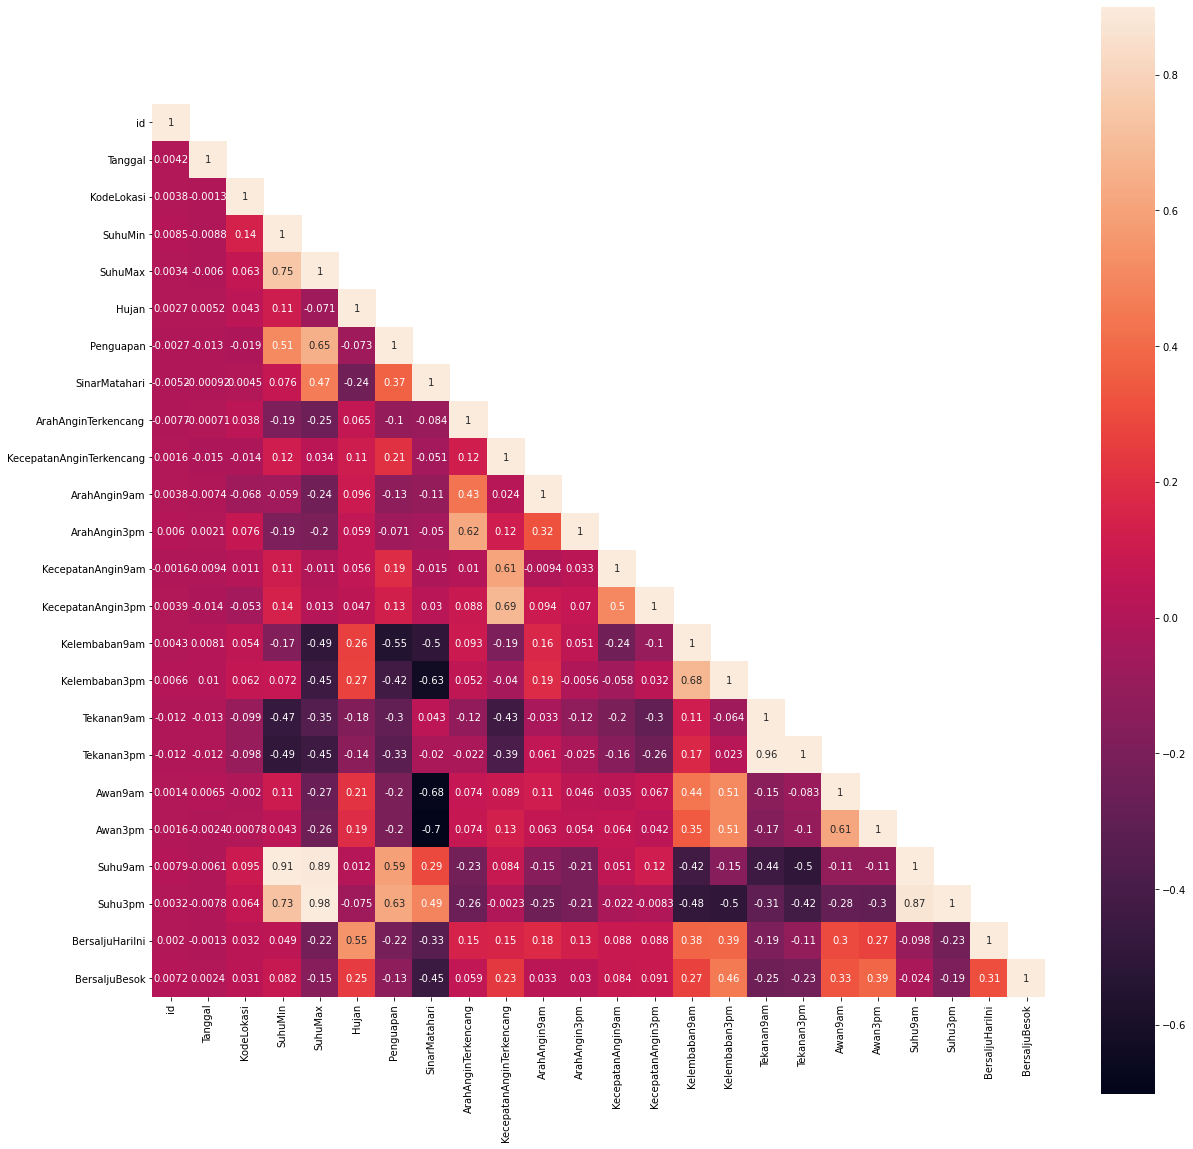

In [9]:
#Buat korelasi dengan heatmap

corr = data.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (10,10))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

SELEKSI DATA YANG PUNYA KORELASI TINGGI

In [10]:
KorelasiTinggi = ["BersaljuBesok", "SuhuMin", "SuhuMax", "Suhu9am", "Suhu3pm", "Penguapan", "SinarMatahari", "Awan9am", "Awan3pm", "Kelembaban9am", "Kelembaban3pm"]
KorelasiTinggi = data[KorelasiTinggi]
KorelasiTinggi.head()
KorelasiTinggi

,BersaljuBesok,SuhuMin,SuhuMax,Suhu9am,Suhu3pm,Penguapan,SinarMatahari,Awan9am,Awan3pm,Kelembaban9am,Kelembaban3pm
3,0,7.3,24.5,15.3,23.2,8.4,10.4,1.0,7.0,25.0,17.0
4,0,5.9,20.3,12.4,18.1,3.6,12.6,2.0,6.0,55.0,48.0
5,0,14.4,21.8,16.7,21.1,3.2,4.4,7.0,7.0,63.0,52.0
6,0,7.7,18.7,11.3,18.3,5.6,9.7,1.0,1.0,69.0,31.0
8,0,18.4,35.3,23.7,34.9,10.0,12.5,0.0,0.0,44.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
109080,0,16.8,34.1,25.6,33.0,12.8,10.3,1.0,4.0,48.0,28.0
109082,0,8.7,19.0,10.8,16.5,1.4,9.6,2.0,2.0,81.0,59.0
109088,0,14.3,26.2,21.1,25.5,8.0,12.6,0.0,2.0,51.0,37.0
109090,1,20.1,23.7,22.0,22.1,7.2,8.9,4.0,6.0,74.0,70.0


## Menampilkan Boxplot

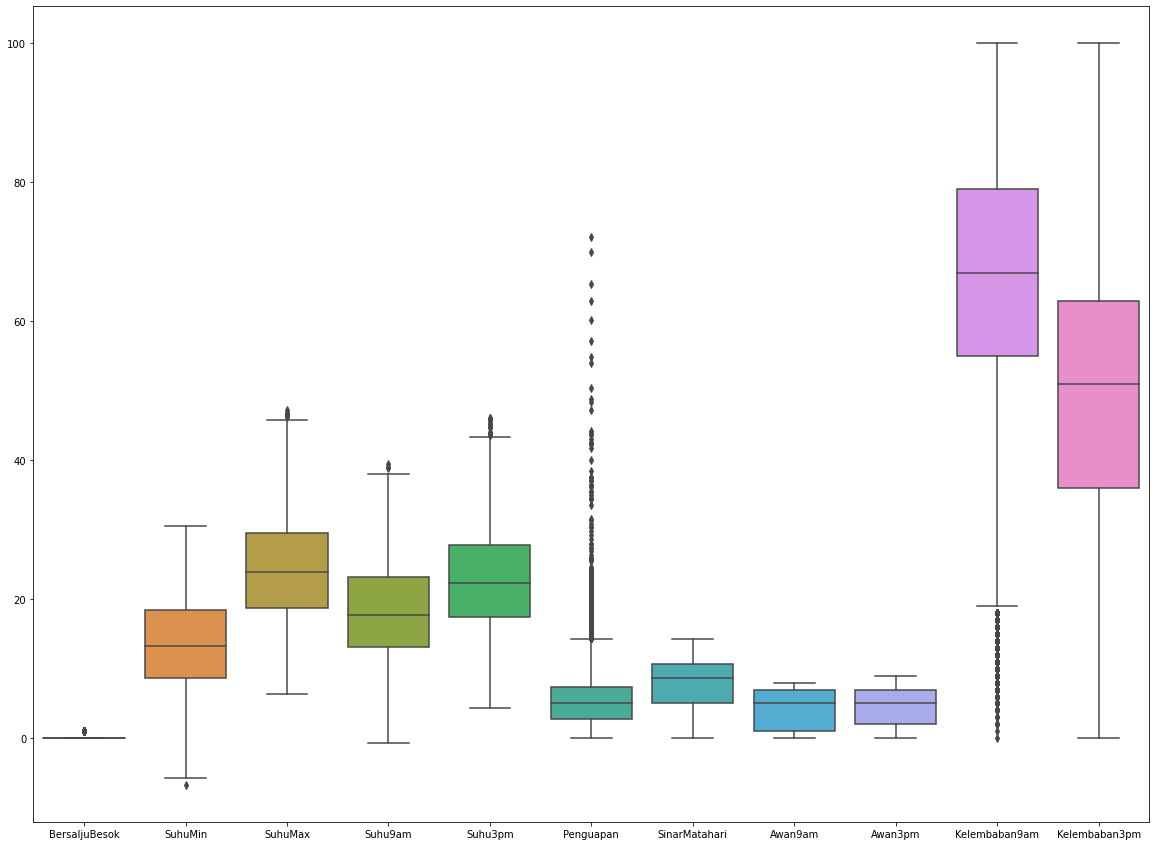

In [11]:
fig = plt.figure(figsize = (20,2))
fig.set_size_inches(20,15)
sns.boxplot(data = KorelasiTinggi)
plt.show()

In [12]:
KorelasiTinggi.drop(KorelasiTinggi[KorelasiTinggi.SuhuMin < -5].index ,inplace =True)
KorelasiTinggi.drop(KorelasiTinggi[KorelasiTinggi.SuhuMax > 40].index ,inplace =True)
KorelasiTinggi.drop(KorelasiTinggi[KorelasiTinggi.Suhu9am > 37].index ,inplace =True)
KorelasiTinggi.drop(KorelasiTinggi[KorelasiTinggi.Suhu3pm > 41].index ,inplace =True)
KorelasiTinggi.drop(KorelasiTinggi[KorelasiTinggi.Penguapan > 13].index ,inplace =True)
KorelasiTinggi.drop(KorelasiTinggi[KorelasiTinggi.Kelembaban9am < 20].index ,inplace =True)
KorelasiTinggi

C:\Users\Adabi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Adabi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Adabi\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Adabi\anaconda3\lib

,BersaljuBesok,SuhuMin,SuhuMax,Suhu9am,Suhu3pm,Penguapan,SinarMatahari,Awan9am,Awan3pm,Kelembaban9am,Kelembaban3pm
3,0,7.3,24.5,15.3,23.2,8.4,10.4,1.0,7.0,25.0,17.0
4,0,5.9,20.3,12.4,18.1,3.6,12.6,2.0,6.0,55.0,48.0
5,0,14.4,21.8,16.7,21.1,3.2,4.4,7.0,7.0,63.0,52.0
6,0,7.7,18.7,11.3,18.3,5.6,9.7,1.0,1.0,69.0,31.0
8,0,18.4,35.3,23.7,34.9,10.0,12.5,0.0,0.0,44.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...
109080,0,16.8,34.1,25.6,33.0,12.8,10.3,1.0,4.0,48.0,28.0
109082,0,8.7,19.0,10.8,16.5,1.4,9.6,2.0,2.0,81.0,59.0
109088,0,14.3,26.2,21.1,25.5,8.0,12.6,0.0,2.0,51.0,37.0
109090,1,20.1,23.7,22.0,22.1,7.2,8.9,4.0,6.0,74.0,70.0


In [13]:
Scaler = MinMaxScaler()
Scaling = Scaler.fit_transform(KorelasiTinggi)
NewCol = ["BersaljuBesok", "SuhuMin", "SuhuMax", "Suhu9am", "Suhu3pm", "Penguapan", "SinarMatahari", "Awan9am", "Awan3pm", "Kelembaban9am", "Kelembaban3pm"]
AfterScaling = pd.DataFrame(Scaling,columns=NewCol)

AfterScaling

,BersaljuBesok,SuhuMin,SuhuMax,Suhu9am,Suhu3pm,Penguapan,SinarMatahari,Awan9am,Awan3pm,Kelembaban9am,Kelembaban3pm
0,0.0,0.352601,0.540059,0.431267,0.535411,0.646154,0.727273,0.125,0.777778,0.0625,0.161616
1,0.0,0.312139,0.415430,0.353100,0.390935,0.276923,0.881119,0.250,0.666667,0.4375,0.474747
2,0.0,0.557803,0.459941,0.469003,0.475921,0.246154,0.307692,0.875,0.777778,0.5375,0.515152
3,0.0,0.364162,0.367953,0.323450,0.396601,0.430769,0.678322,0.125,0.111111,0.6125,0.303030
4,0.0,0.673410,0.860534,0.657682,0.866856,0.769231,0.874126,0.000,0.000000,0.3000,0.171717
...,...,...,...,...,...,...,...,...,...,...,...
40416,0.0,0.627168,0.824926,0.708895,0.813031,0.984615,0.720280,0.125,0.444444,0.3500,0.272727
40417,0.0,0.393064,0.376855,0.309973,0.345609,0.107692,0.671329,0.250,0.222222,0.7625,0.585859
40418,0.0,0.554913,0.590504,0.587601,0.600567,0.615385,0.881119,0.000,0.222222,0.3875,0.363636
40419,1.0,0.722543,0.516320,0.611860,0.504249,0.553846,0.622378,0.500,0.666667,0.6750,0.696970


<AxesSubplot:>

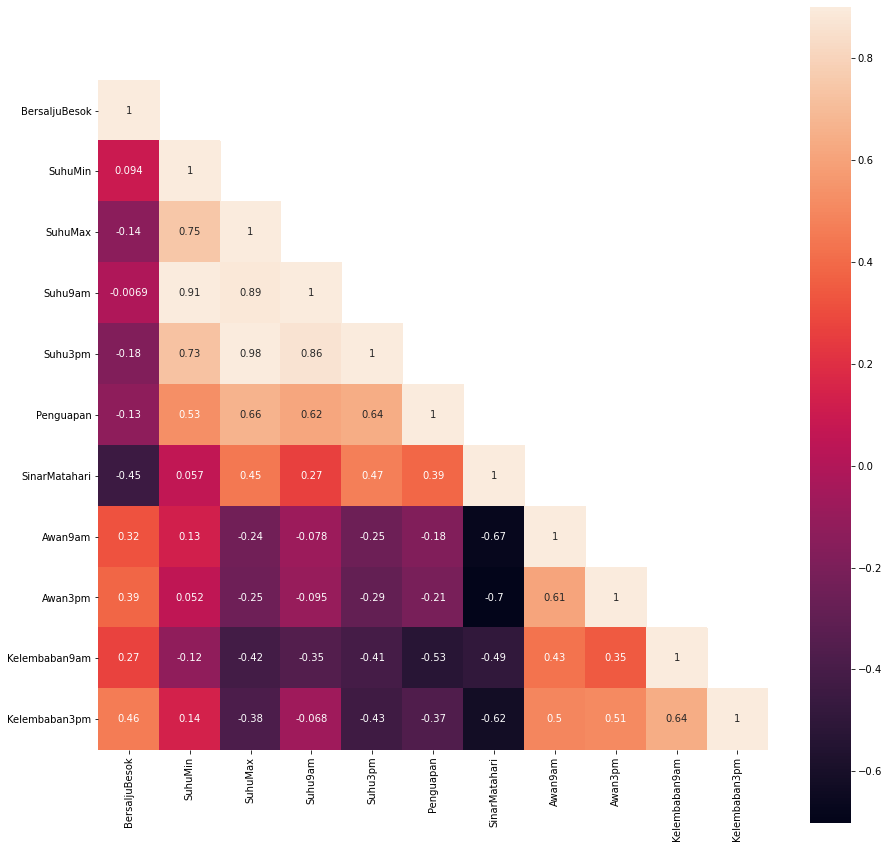

In [14]:
#Buat korelasi dengan heatmap
corr = AfterScaling.corr(method = 'pearson')

mask = np.array(corr)

mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (10,2))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

In [15]:
AfterScaling.to_csv('Data_After_Scaling.csv')

In [16]:
epsilon = list(range(5)) 

for k in range(1,6): 
    
    cluster = pd.read_csv("Data_After_Scaling.csv", usecols=["Awan3pm", "Kelembaban3pm"], nrows=20000) 
    
    rows = cluster.shape[0]
    cols = cluster.shape[1]
  
    centroids = cluster.loc[np.random.randint(1,rows+1,k)]
    centroids['new'] = list(range(1,k+1))
    centroids.set_index('new',inplace = True) 
    d = np.random.rand(rows)

    number_of_iterations = 15
    temp_epsilon = list(range(number_of_iterations))

    for i in range(0,number_of_iterations):

        for j in range(0,rows):
            d[j] = ((centroids - cluster.loc[j])**2).sum(axis = 1).idxmin()
        cluster['centroid number'] = d 

        mean_x = list(range(k))
        mean_y = list(range(k))
        for m in range(0,k):
            mean_x[m] = cluster[cluster['centroid number'] == (m+1)]['Awan3pm'].mean()
            mean_y[m] = cluster[cluster['centroid number'] == (m+1)]['Kelembaban3pm'].mean()
        centroids.replace(list(centroids['Awan3pm']),mean_x,inplace = True)
        centroids.replace(list(centroids['Kelembaban3pm']),mean_y,inplace = True)
    
        z = list(range(k))
        for p in range(0,k):
            z[p] = ((cluster[cluster['centroid number'] == p+1][['Awan3pm','Kelembaban3pm']] - centroids.iloc[p])**2).values.sum()
        temp_epsilon[i] = sum(z) 
        
        epsilon[k-1] = temp_epsilon[i]
    
    %reset_selective -f centroids

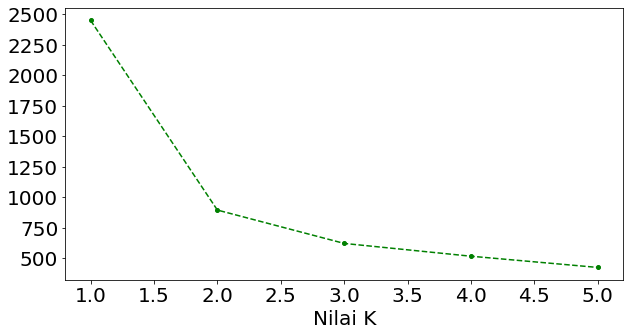

In [17]:
k = list(range(1,6)) 
plt.figure(figsize=(10,5)) 
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.plot(k,epsilon,'go--', linewidth=1.5, markersize=4)
plt.xlabel('Nilai K', fontsize = 20)


plt.show()

# Dataframe --> Array

In [18]:
Scaled = pd.read_csv("Data_After_Scaling.csv", usecols=["Awan3pm", "Kelembaban3pm"])
Scaled.head()
Scaled

,Awan3pm,Kelembaban3pm
0,0.777778,0.161616
1,0.666667,0.474747
2,0.777778,0.515152
3,0.111111,0.303030
4,0.000000,0.171717
...,...,...
40416,0.444444,0.272727
40417,0.222222,0.585859
40418,0.222222,0.363636
40419,0.666667,0.696970


In [19]:
dfAwan3pm = Scaled.Awan3pm
dfKelembaban3pm = Scaled.Kelembaban3pm

ScaledArray = []
i = 0

while i<len(Scaled):
    AllScaledArray = [dfAwan3pm[i], dfKelembaban3pm[i]]
    ScaledArray.append(AllScaledArray)
    i+=1

# CLUSTERING

In [20]:
#Euclidean Distance
def Euclidean(centroid, data):
    Hasil = 0
    for i in range(len(data)-1):
         Hasil += (data[i] - centroid[i])**2
    return math.sqrt(Hasil)

In [21]:
#Centroid
def CreateCentroid(cluster):
    x = 0
    y = 0
    
    for i in range(len(cluster)):
        x = x + cluster[i][0]
        y = y + cluster[i][1]
    
    avgX = x/len(cluster)
    avgY = y/len(cluster)
    centroid = [avgX, avgY]
    return centroid

In [22]:
#KMeans 
def KMeans(data, max_iteration):
    centro1 = data[rd.randint(0,39744)]
    centro2 = data[rd.randint(0,39744)]
    selisih = 1
    i = 0
    
    while (selisih!=0) and (i < max_iteration):
        cluster1 = []
        cluster2 = []
        TempCentro1 = centro1
        TempCentro2 = centro2
        for j in range(len(data)):
            distance1 = Euclidean(TempCentro1, data[j])
            distance2 = Euclidean(TempCentro2, data[j])
            if distance1<distance2:
                cluster1.append(data[j])
            else:
                cluster2.append(data[j])
        centro1 = CreateCentroid(cluster1)
        centro2 = CreateCentroid(cluster2)
        selisih = (centro1[0]-TempCentro1[0])+(centro1[1]-TempCentro1[1])+(centro2[0]-TempCentro2[0])+(centro2[1]-TempCentro2[1])
        i += 1
    
    NewCentroids = [centro1, centro2]
    
    return NewCentroids, cluster1, cluster2

In [23]:
NewCentroids, cluster1, cluster2 = KMeans(ScaledArray, 100)

In [24]:
awan3pmCentroids1 = []
awan3pmCentroids2 = []
kelembaban3pmCentroids1 = []
kelembaban3pmCentroids2 = []

for k in range(len(cluster1)):
    awan3pmCentroids1.append(cluster1[k][0])
    kelembaban3pmCentroids1.append(cluster1[k][1])
    
for l in range(len(cluster2)):
    awan3pmCentroids2.append(cluster2[l][0])
    kelembaban3pmCentroids2.append(cluster2[l][1])

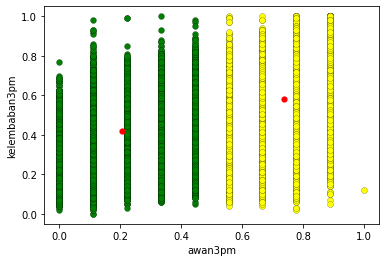

In [28]:
plt.scatter(awan3pmCentroids1, kelembaban3pmCentroids1, color ='green', edgecolors='black', linewidth=0.19)
plt.scatter(awan3pmCentroids2, kelembaban3pmCentroids2, color ='yellow', edgecolors='black', linewidth=0.19)
plt.scatter(NewCentroids[0][0], NewCentroids[0][1], color ='red', linewidth = 0.19)
plt.scatter(NewCentroids[1][0], NewCentroids[1][1], color ='red', linewidth = 0.19)

plt.xlabel('awan3pm')
plt.ylabel('kelembaban3pm')

plt.show()

In [26]:
awan3pmCentroids1, kelembaban3pmCentroids1 = zip(*cluster1)
frameCluster1 = pd.DataFrame({'Awan3pm': awan3pmCentroids1, 'Kelembaban3pm': kelembaban3pmCentroids1}, columns=['Awan3pm', 'Kelembaban3pm'])
frameCluster1

awan3pmCentroids2, kelembaban3pmCentroids2 = zip(*cluster2)
frameCluster2 = pd.DataFrame({'Awan3pm': awan3pmCentroids2, 'Kelembaban3pm': awan3pmCentroids2}, columns=['Awan3pm', 'Kelembaban3pm'])

In [27]:
frameCluster1['Cluster'] = 'Tidak Bersalju'
frameCluster2['Cluster'] = 'Bersalju'

frameClusters = pd.concat([frameCluster1, frameCluster2], axis=0)
frameClusters


frameClusters
frameClusters.to_csv('Data_After_Clustering.csv')